# 08 - Visualizing 2D Fitness Landscapes
### [Last Update: June 2022][![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RobertTLange/evosax/blob/main/examples/08_bbo_visualize.ipynb)

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

!pip install -q git+https://github.com/RobertTLange/evosax.git@main

In [1]:
import jax
import jax.numpy as jnp
from evosax import CMA_ES
from evosax.problems import BBOBFitness
from evosax.utils import BBOBVisualizer

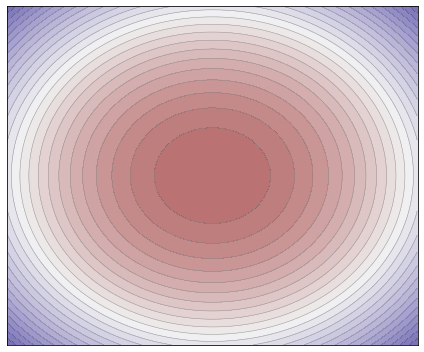

In [2]:
visualizer = BBOBVisualizer(
    None,
    None,
    "Sphere",
    "",
    plot_log_fn=False,
    plot_title=False,
    plot_labels=False,
    plot_colorbar=False,
)
visualizer.plot_contour_2d(save=False)

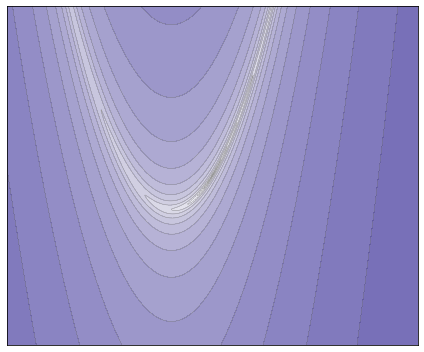

In [3]:
visualizer = BBOBVisualizer(
    None,
    None,
    "RosenbrockOriginal",
    "",
    plot_log_fn=True,
    plot_title=False,
    plot_labels=False,
    plot_colorbar=False,
)
visualizer.plot_contour_2d(save=False)
# visualizer.plot_contour_3d(save=False)

DifferentPowers (20, 4) (20, 4, 2)


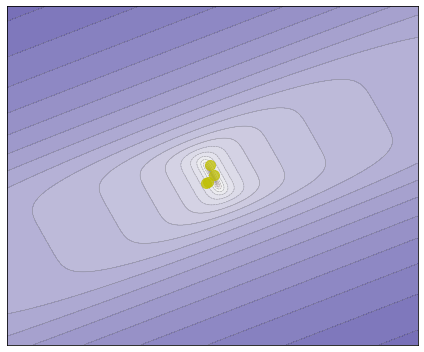

In [7]:
rng = jax.random.key(1)
strategy = CMA_ES(population_size=4, num_dims=2)
es_params = strategy.default_params.replace(
    init_min=-2.5, init_max=2.5, sigma_init=0.25
)
es_state = strategy.init(rng, es_params)

problem = BBOBFitness("DifferentPowers", 2)

X, fitness = [], []
for g in range(20):
    rng, rng_ask, rng_eval = jax.random.split(rng, 3)
    x, es_state = strategy.ask(rng, es_state, es_params)
    fit = problem.rollout(rng_eval, x)
    es_state = strategy.tell(x, fit, es_state, es_params)
    X.append(x)
    fitness.append(fit)

X = jnp.stack(X)
fitness = jnp.stack(fitness)
print("DifferentPowers", fitness.shape, X.shape)
visualizer = BBOBVisualizer(
    X,
    fitness,
    "DifferentPowers",
    "CMA-ES",
    use_3d=False,
    plot_log_fn=True,
    interval=150,
    plot_title=False,
    plot_labels=False,
    plot_colorbar=False,
)
visualizer.animate("DifferentPowers.gif")
# visualizer = BBOBVisualizer(X, None, "Sphere", "Test Strategy", use_3d=False)
# visualizer.animate("anim.gif")

Sphere (20, 4) (20, 4, 2)


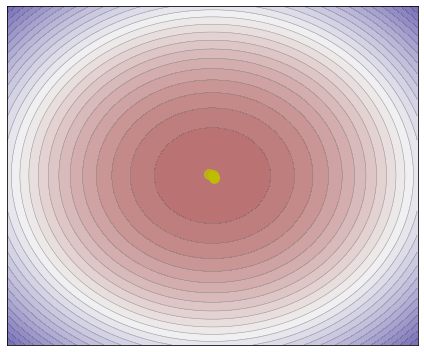

In [6]:
rng = jax.random.key(1)
strategy = CMA_ES(population_size=4, num_dims=2)
es_params = strategy.default_params.replace(
    init_min=-2.5, init_max=2.5, sigma_init=0.25
)
es_state = strategy.init(rng, es_params)

problem = BBOBFitness("Sphere", 2)

X, fitness = [], []
for g in range(20):
    rng, rng_ask, rng_eval = jax.random.split(rng, 3)
    x, es_state = strategy.ask(rng, es_state, es_params)
    fit = problem.rollout(rng_eval, x)
    es_state = strategy.tell(x, fit, es_state, es_params)
    X.append(x)
    fitness.append(fit)

X = jnp.stack(X)
fitness = jnp.stack(fitness)
print("Sphere", fitness.shape, X.shape)
visualizer = BBOBVisualizer(
    X,
    fitness,
    "Sphere",
    "CMA-ES",
    use_3d=False,
    plot_log_fn=False,
    interval=150,
    plot_title=False,
    plot_labels=False,
    plot_colorbar=False,
)
visualizer.animate("Sphere.gif")
# visualizer = BBOBVisualizer(X, None, "Sphere", "Test Strategy", use_3d=False)
# visualizer.animate("anim.gif")